<a href="https://colab.research.google.com/github/SatoruGojo9/24f1002697_git_challenge_lab/blob/main/MLP_25T3_OPPE1_24f1002697.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Practice
Online Proctored Programming Exam

# Please regularly save your Answers in the exam portal by clicking on "Submit" button

In [1]:
# @title Student's Details to be filled before the exam starts: { run: "auto", vertical-output: true, form-width: "100%", display-mode: "form" }

Student_Name = "SHREESH GURURAJ KULKARNI" # @param {type:"string"}
Student_Roll_No = "24f1002697" # @param {type:"string"}

try:
  if len(Student_Name) == 0:
    raise ValueError("Warning:  Please write your name")
  elif len(Student_Roll_No)==0:
    raise ValueError("Warning: Please write your roll number")

  else:
    print(f"Best Of Luck {Student_Name}({Student_Roll_No})")

except ValueError as e:
  print(e)

Best Of Luck SHREESH GURURAJ KULKARNI(24f1002697)


# Unit 1 of 2: Preprocessing

### Q. 1:

In [6]:
import pandas as pd

import numpy as np

In [5]:
data = pd.read_csv("/content/MLP_25T3_Preprocessing_V3.csv")
data.head()

,Employee_ID,Age,Department,Experience_Years,Work_Hours_Per_Week,Projects_Handled,Training_Score,Remote_Work,Productivity_Score
0,E00232,48.830268,hr,10.625229,43.018354,0.459505,27.043919,Yes,22.588506
1,E08037,NaN,Sales,5.181035,25.781576,3.505160,53.258325,No,8.578072
2,E01143,17.145373,Finance,12.181057,8.911620,8.304256,45.228594,No,33.334218
3,E04372,36.692032,Tech,11.552678,44.644750,2.333258,53.665846,No,26.330975
4,E04939,62.129822,sales,21.505931,34.552660,3.883963,132.918054,Yes,29.458140


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5915 entries, 0 to 5914
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Employee_ID          5915 non-null   object 
 1   Age                  5785 non-null   float64
 2   Department           5797 non-null   object 
 3   Experience_Years     5800 non-null   float64
 4   Work_Hours_Per_Week  5915 non-null   float64
 5   Projects_Handled     5915 non-null   float64
 6   Training_Score       5787 non-null   float64
 7   Remote_Work          5915 non-null   object 
 8   Productivity_Score   5915 non-null   float64
dtypes: float64(6), object(3)
memory usage: 416.0+ KB


In [7]:
Q1 = data["Experience_Years"].quantile(0.25)
Q2 = data["Experience_Years"].quantile(0.75)

IQR = Q2 - Q1
print(f'Interquartile range is : {np.round(IQR, 1)}')


Interquartile range is : 20.0


### Q. 2:

In [16]:
count_of_emp = data[(data["Department"] == "Sales") & (data["Age"] > 25) & (data["Remote_Work"] == "No")]
print(count_of_emp)
print(count_of_emp.shape)
print(count_of_emp.shape[0])

     Employee_ID        Age Department  Experience_Years  Work_Hours_Per_Week  \
12        E02134  68.773316      Sales         38.662701            23.542952   
37        E08339  61.747918      Sales          9.496782            28.117405   
51        E01743  30.393110      Sales          5.413934            44.610347   
52        E00755  41.015275      Sales         39.310130            18.550637   
67        E00754  48.128102      Sales         21.692558            37.640416   
...          ...        ...        ...               ...                  ...   
5749      E05779  31.112217      Sales         -2.897073            25.836366   
5767      E04417  41.223472      Sales          1.755056            58.444822   
5802      E04859  60.303908      Sales          9.600813            67.092197   
5875      E02983  71.948117      Sales         21.969145            16.823534   
5906      E04645  28.227269      Sales         18.808482            31.320140   

      Projects_Handled  Tra

### Q. 3:

In [17]:
numerical_features = data.select_dtypes(exclude='object').columns
print(numerical_features)

Index(['Age', 'Experience_Years', 'Work_Hours_Per_Week', 'Projects_Handled',
       'Training_Score', 'Productivity_Score'],
      dtype='object')


In [20]:
correlation_matrix = data[numerical_features].corr()
print(correlation_matrix)

                          Age  Experience_Years  Work_Hours_Per_Week  \
Age                  1.000000          0.519934            -0.022994   
Experience_Years     0.519934          1.000000             0.016662   
Work_Hours_Per_Week -0.022994          0.016662             1.000000   
Projects_Handled    -0.003516          0.005975             0.001472   
Training_Score       0.011097          0.006494             0.016222   
Productivity_Score   0.097530          0.113846             0.054333   

                     Projects_Handled  Training_Score  Productivity_Score  
Age                         -0.003516        0.011097            0.097530  
Experience_Years             0.005975        0.006494            0.113846  
Work_Hours_Per_Week          0.001472        0.016222            0.054333  
Projects_Handled             1.000000        0.000337            0.033478  
Training_Score               0.000337        1.000000            0.207477  
Productivity_Score           0.033478  

<Axes: >

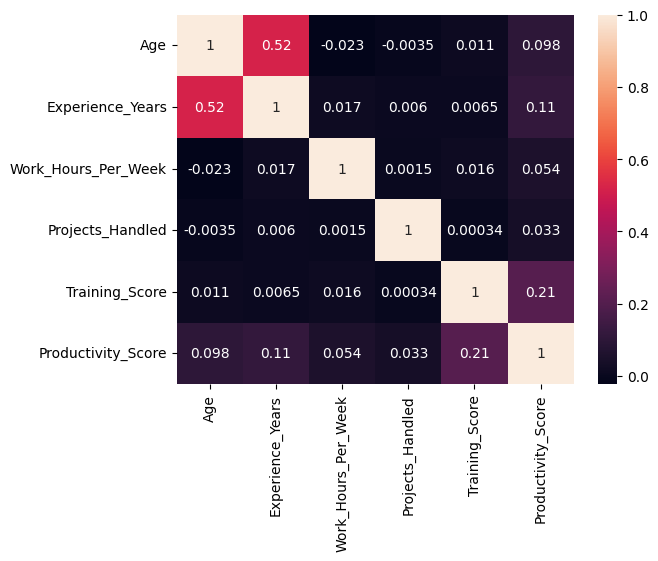

In [21]:
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True)

### Q. 4:

In [24]:
categorical_columns = data.select_dtypes(include='object').columns
print(categorical_columns)
print(numerical_features)

Index(['Employee_ID', 'Department', 'Remote_Work'], dtype='object')
Index(['Age', 'Experience_Years', 'Work_Hours_Per_Week', 'Projects_Handled',
       'Training_Score', 'Productivity_Score'],
      dtype='object')


In [27]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

In [30]:
trs = ColumnTransformer([
    ('tr1', SimpleImputer(strategy='mean'), ['Age', 'Experience_Years', 'Work_Hours_Per_Week', 'Projects_Handled',
       'Training_Score', 'Productivity_Score']),
    ('tr2', SimpleImputer(strategy='most_frequent'), ['Employee_ID', 'Department', 'Remote_Work'])
], remainder='passthrough').set_output(transform='pandas')

In [31]:
data_transformed = trs.fit_transform(data)
print(data_transformed)

       tr1__Age  tr1__Experience_Years  tr1__Work_Hours_Per_Week  \
0     48.830268              10.625229                 43.018354   
1     40.628210               5.181035                 25.781576   
2     17.145373              12.181057                  8.911620   
3     36.692032              11.552678                 44.644750   
4     62.129822              21.505931                 34.552660   
...         ...                    ...                       ...   
5910  59.349338              11.588628                 41.091760   
5911  56.427152              28.779456                 47.577839   
5912  50.823420              23.082576                 38.595710   
5913  40.452066               3.866968                 36.016938   
5914  26.846830               3.045907                 50.586227   

      tr1__Projects_Handled  tr1__Training_Score  tr1__Productivity_Score  \
0                  0.459505            27.043919                22.588506   
1                  3.505160  

In [33]:
mean = data_transformed["tr1__Training_Score"].mean()
print(np.round(mean, 2))

70.6


### Q. 5:

In [37]:
for column in data_transformed.columns:
    if data_transformed[column].dtype == "object":
       print(data_transformed[column].unique())
    else:
       print(data_transformed[column].unique())

[48.83026805 40.62820991 17.14537285 ... 50.82341962 40.45206588
 26.84683032]
[10.62522858  5.1810354  12.18105735 ... 23.08257562  3.86696758
  3.04590728]
[43.01835355 25.78157647  8.91161988 ... 38.59570964 36.01693805
 50.58622687]
[0.45950517 3.50516034 8.30425589 ... 6.05145086 3.60157059 6.24778028]
[27.04391866 53.25832453 45.22859447 ... 99.14563715 42.08086542
 59.23900493]
[22.5885056   8.57807233 33.33421763 ... 48.09457473 15.85465668
 18.42014192]
['E00232' 'E08037' 'E01143' ... 'E01417' 'E02753' 'E04610']
['hr' 'Sales' 'Finance' 'Tech' 'sales' 'HR' 'tech' 'Support']
['Yes' 'No']


In [115]:
data_transformed["tr2__Department"].replace('tech', 'Tech')
print(data_transformed)
data_transformed["tr2__Department"].unique()

KeyError: 'tr2__Department'

In [42]:
encoder = OneHotEncoder()

crs = ColumnTransformer([
    ('crs1', OneHotEncoder(), ["tr2__Department"])
], remainder='passthrough').set_output(transform='pandas')

crs.fit_transform(data_transformed)


ValueError: Pandas output does not support sparse data. Set sparse_output=False to output pandas dataframes or disable Pandas output via` ohe.set_output(transform="default").

### Q. 6:



### Q. 7:

In [116]:
trs = ColumnTransformer([
    ('tr1', SimpleImputer(strategy='mean'), ['Age', 'Experience_Years', 'Work_Hours_Per_Week', 'Projects_Handled',
       'Training_Score', 'Productivity_Score']),
    ('tr2', SimpleImputer(strategy='most_frequent'), ['Employee_ID', 'Department', 'Remote_Work'])
], remainder='passthrough', verbose_feature_names_out=False).set_output(transform='pandas')

data_one_transformed = trs.fit(data)

transformer = ColumnTransformer([
    ('crs1', OneHotEncoder(), ["Department"])
], remainder='passthrough').set_output(transform='pandas')

transformer.fit_transform(data_one_transformed)



ValueError: Expected 2D array, got scalar array instead:
array=ColumnTransformer(remainder='passthrough',
                  transformers=[('tr1', SimpleImputer(),
                                 ['Age', 'Experience_Years',
                                  'Work_Hours_Per_Week', 'Projects_Handled',
                                  'Training_Score', 'Productivity_Score']),
                                ('tr2', SimpleImputer(strategy='most_frequent'),
                                 ['Employee_ID', 'Department', 'Remote_Work'])],
                  verbose_feature_names_out=False).
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### Q. 8:

### Q. 9:


### Q. 10:

### Create extra code cells if more questions are there

# Unit 2 of 2: Model Building

# Please regularly save your Answers in the exam portal by clicking on "Submit" button

### Q.1:

In [47]:
df = pd.read_csv("/content/MLP_25T3_modelbuilding_V1.csv")
df.head()

,Age,Experience_Years,Work_Hours_Per_Week,Projects_Handled,Training_Score,Remote_Work,Productivity_Score,Department_finance,Department_hr,Department_sales,Department_support,Department_tech
0,0.682903,0.509280,0.193619,0.476475,0.503474,0,40.655208,0.0,0.0,0.0,0.0,1.0
1,0.771425,0.687746,0.041513,0.217542,0.606768,1,43.904473,1.0,0.0,0.0,0.0,0.0
2,0.043655,0.000000,0.190304,0.252128,0.733227,0,33.404878,0.0,0.0,0.0,0.0,1.0
3,0.248844,0.241123,0.146171,0.245888,0.273861,0,24.377786,0.0,0.0,0.0,1.0,0.0
4,0.517205,0.614170,0.144756,0.282962,0.438302,0,22.413580,1.0,0.0,0.0,0.0,0.0


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [57]:
X = df.drop("Productivity_Score", axis=1)
y = df["Productivity_Score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [58]:
print(X_train)

print(y_train)

           Age  Experience_Years  Work_Hours_Per_Week  Projects_Handled  \
1370  0.251572          0.276652             0.203061          0.346280   
453   0.920694          0.464236             0.103921          0.309411   
2584  0.292515          0.000000             0.109512          0.346387   
2571  0.164581          0.218706             0.191000          0.169057   
5540  0.493100          0.539908             0.147786          0.508600   
...        ...               ...                  ...               ...   
4931  0.126880          0.000000             0.043476          0.253925   
3264  0.476431          0.517758             0.161130          0.689396   
1653  0.448074          0.361078             0.125429          0.257136   
2607  0.305484          0.069971             0.194873          0.208468   
2732  0.531687          0.262675             0.226674          0.323879   

      Training_Score  Remote_Work  Department_finance  Department_hr  \
1370        0.609998       

In [59]:
print(X_test)

           Age  Experience_Years  Work_Hours_Per_Week  Projects_Handled  \
4744  0.336921          0.159572             0.187728          0.595610   
4612  0.606794          0.306167             0.364065          0.336933   
4490  0.675153          0.567816             0.099147          0.349033   
4302  0.522836          0.601123             0.196605          0.256215   
3933  0.524229          0.374172             0.162117          0.406376   
...        ...               ...                  ...               ...   
378   0.226931          0.000000             0.199287          0.138754   
4906  0.188143          0.122763             0.121345          0.447876   
3578  0.309399          0.195159             0.173395          0.623968   
829   0.162901          0.168979             0.062752          0.188126   
2216  0.725211          0.605013             0.098239          0.309985   

      Training_Score  Remote_Work  Department_finance  Department_hr  \
4744        0.686770       

In [62]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

transformer = ColumnTransformer([
    ('tr1', StandardScaler(), ["Age"])
], remainder='passthrough', verbose_feature_names_out=False).set_output(transform='pandas')

In [63]:
df_transformed = transformer.fit_transform(df)
print(df_transformed)

           Age  Experience_Years  Work_Hours_Per_Week  Projects_Handled  \
0     1.302074          0.509280             0.193619          0.476475   
1     1.720913          0.687746             0.041513          0.217542   
2    -1.722527          0.000000             0.190304          0.252128   
3    -0.751673          0.241123             0.146171          0.245888   
4     0.518075          0.614170             0.144756          0.282962   
...        ...               ...                  ...               ...   
5910 -0.382648          0.345981             0.296381          0.129322   
5911 -0.086214          0.346770             0.108206          0.283879   
5912  0.087045          0.572762             0.187434          0.253123   
5913  0.681248          0.490208             0.215625          0.366467   
5914 -0.334440          0.296077             0.214327          0.217257   

      Training_Score  Remote_Work  Productivity_Score  Department_finance  \
0           0.503474  

In [65]:
median = df_transformed["Age"].median()
print(np.round(median, 3))

-0.061


### Q. 2:

In [68]:
from sklearn.metrics import r2_score, mean_squared_error
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

score = r2_score(model.predict(X_test), y_test)
print(np.round(score, 2))

-2.29


### Q. 3:

In [71]:
rmse = np.sqrt(mean_squared_error(model.predict(X_test), y_test))
rmse_1 = mean_squared_error(model.predict(X_test), y_test)
print(np.round(rmse, 2))
print(np.round(rmse_1, 2))

7.74
59.83


### Q. 4:

In [74]:

print(model.coef_)
print(np.round(1.3721722, 2))


[ 1.3721722   6.4622017   7.40176383  4.71160072 21.3211613   3.62992693
  0.11133492  0.03112201 -0.17373423 -0.04667072  0.07794802]
1.37


### Q. 5:

In [75]:
lasso = Lasso(alpha=1, max_iter=1000, random_state=0)


In [76]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
lasso.fit(X_train, y_train)
mse = mean_squared_error(model.predict(X_test), y_test)
mae = mean_absolute_error(model.predict(X_test), y_test)
print(mse)
print(mae)
ratio = mse / mae

print(ratio)
print(np.round(ratio, 2))

59.83227288193632
6.28867712433162
9.514286025345191
9.51


### Q. 6:



In [85]:
from sklearn.tree import DecisionTreeRegressor

In [86]:
model = DecisionTreeRegressor(max_depth=5, min_samples_split=10, random_state=0)

In [90]:
model.fit(X_train, y_train)
print(model.feature_importances_)
model.feature_importances_.argmax()
print(X_train.info())

[0.03059894 0.13681331 0.02364691 0.         0.65387652 0.14959962
 0.         0.         0.         0.         0.00546471]
<class 'pandas.core.frame.DataFrame'>
Index: 4732 entries, 1370 to 2732
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  4732 non-null   float64
 1   Experience_Years     4732 non-null   float64
 2   Work_Hours_Per_Week  4732 non-null   float64
 3   Projects_Handled     4732 non-null   float64
 4   Training_Score       4732 non-null   float64
 5   Remote_Work          4732 non-null   int64  
 6   Department_finance   4732 non-null   float64
 7   Department_hr        4732 non-null   float64
 8   Department_sales     4732 non-null   float64
 9   Department_support   4732 non-null   float64
 10  Department_tech      4732 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 443.6 KB
None


### Q. 7:

In [92]:
from sklearn.model_selection import GridSearchCV

In [96]:
?DecisionTreeRegressor

In [97]:
params = {
    'max_depth' : [3, 5, 7],
    'min_samples_split' : [5, 10, 20]
}
model_one = GridSearchCV(DecisionTreeRegressor(), params, cv=5, scoring='neg_mean_squared_error')

In [98]:
model_one.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_split': [5, 10, 20]},
             scoring='neg_mean_squared_error')

In [99]:
model_one.best_params_

{'max_depth': 5, 'min_samples_split': 10}

### Q. 8:

### Q. 9:

In [101]:
from sklearn.ensemble import AdaBoostRegressor

model = AdaBoostRegressor(random_state=0)

model.fit(X_train, y_train)

print(np.round(mean_absolute_error(model.predict(X_test), y_test), 2))

6.68


### Q. 10:

In [102]:
params = {
    'n_estimators' : [50, 100],
    'learning_rate' : [0.01, 0.1]
}
model_two = GridSearchCV(AdaBoostRegressor(random_state=0), params, cv=5, scoring='neg_mean_squared_error')

In [103]:
model_two.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(random_state=0),
             param_grid={'learning_rate': [0.01, 0.1],
                         'n_estimators': [50, 100]},
             scoring='neg_mean_squared_error')

In [104]:
print(model_two.best_estimator_)

AdaBoostRegressor(learning_rate=0.1, n_estimators=100, random_state=0)


### Create extra code cells if more questions are there

In [105]:
from sklearn.neighbors import KNeighborsRegressor

In [107]:
params = {
    'n_neighbors' : [3, 4, 5, 6, 7]
}

model_three = GridSearchCV(KNeighborsRegressor(), params, cv=5, scoring='neg_mean_squared_error')

model_three.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7]},
             scoring='neg_mean_squared_error')

In [108]:
model_three.best_params_

{'n_neighbors': 7}

In [109]:
from sklearn.neural_network import MLPRegressor

In [113]:
model_four = MLPRegressor(hidden_layer_sizes=[64, 32, 16], solver='adam', activation='relu', random_state=0, max_iter=100)

In [114]:
model_four.fit(X_train, y_train)
print(np.round(np.sqrt(mean_squared_error(model_four.predict(X_test), y_test)),2))

7.74
